<h1 style="color:red"><center>Análisis de Criptomonedas</center></h1>

[![cripto1.png](https://i.postimg.cc/J0xqY2Jt/cripto1.png)](https://postimg.cc/fS3mJ58h)

In [288]:
# Importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pycoingecko import CoinGeckoAPI
from functools import reduce
from matplotlib.dates import AutoDateLocator, DateFormatter
sns.set_theme(color_codes=True)

In [289]:
# Instanciamos el API
cg = CoinGeckoAPI()

In [290]:
# Obtenemos los datos de las criptomonedas, de los cuales algunos de ellos serán necesarios
categorias = cg.get_coins_markets(vs_currency='usd')
categorias = pd.DataFrame(categorias)
categorias.head(3)

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26070.000000,507637198281,1,547675202605.000000,8828818795.000000,26206.000000,...,21000000.000000,21000000.000000,69045.000000,-62.227560,2021-11-10T14:24:11.849Z,67.810000,38360.811320,2013-07-06T00:00:00.000Z,None,2023-08-22T12:44:23.871Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1665.350000,200230612575,2,200230612575.000000,5820209199.000000,1678.950000,...,120211067.730788,NaN,4878.260000,-65.855420,2021-11-10T14:24:19.604Z,0.432979,384598.170120,2015-10-20T00:00:00.000Z,"{'times': 84.40267788436411, 'currency': 'btc'...",2023-08-22T12:44:21.321Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999032,82766254220,3,82766254220.000000,10889272276.000000,1.003000,...,82846484080.779205,NaN,1.320000,-24.492850,2018-07-24T00:00:00.000Z,0.572521,74.496930,2015-03-02T00:00:00.000Z,None,2023-08-22T12:40:00.628Z


<h2>Grupos de Criptomonedas</h2>
Obtenemos las categorías que vamos a utilizar y de las cuales vamos a extraer 5 Criptomonedas de cada una

In [291]:
# Obtenemos las categorías con las cuales vamos a estar trabajando
coinCategoriesData = cg.get_coins_categories()
filtered_categories = []
target_categories = ['Stablecoins', 'Smart Contract Platform', 'Decentralized Finance (DeFi)']
for category in coinCategoriesData:
    if category['name'] in target_categories:
        filtered_categories.append(category)

categorias_necesarias = filtered_categories
df_categorias_necesarias = pd.DataFrame(categorias_necesarias)
df_categorias_necesarias

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,smart-contract-platform,Smart Contract Platform,305157358729.089539,-1.814694,Smart contract platforms are usually blockchai...,[https://assets.coingecko.com/coins/images/279...,8902431496.426682,2023-08-22T12:40:09.163Z
1,stablecoins,Stablecoins,124220593975.480179,-0.063027,,[https://assets.coingecko.com/coins/images/325...,18376712566.269096,2023-08-22T12:40:08.742Z
2,decentralized-finance-defi,Decentralized Finance (DeFi),43306102156.368111,-1.307761,,[https://assets.coingecko.com/coins/images/134...,34127260939.228252,2023-08-22T12:40:13.927Z


De cada uno de los grupos que hemos escogido, vamos a seleccionar las 5 Criptomonedas con mayor ranking de Capitalización de Mercado de cada grupo

In [292]:
# Obtenemos las criptomonedas por market cap rank
def get_top_coins_by_market_rank(vs_currency: str, num_coins: int):
    coin_markets = cg.get_coins_markets(vs_currency=vs_currency)
    sorted_coins = sorted(coin_markets, key=lambda coin: coin['market_cap_rank'])
    top_coins = sorted_coins[:num_coins]
    df = pd.DataFrame(top_coins, columns=['market_cap_rank', 'id', 'name', 'symbol'])
    return df

vs_currency = 'usd'
num_coins = 50
top_coins_df = get_top_coins_by_market_rank(vs_currency, num_coins)
top_coins_df

,market_cap_rank,id,name,symbol
0,1,bitcoin,Bitcoin,btc
1,2,ethereum,Ethereum,eth
2,3,tether,Tether,usdt
3,4,binancecoin,BNB,bnb
4,5,ripple,XRP,xrp
5,6,usd-coin,USD Coin,usdc
6,7,staked-ether,Lido Staked Ether,steth
7,8,cardano,Cardano,ada
8,9,dogecoin,Dogecoin,doge
9,10,solana,Solana,sol


In [293]:
# Obtenemos las criptomonedas y sus movimientos en las ultimas 24h
crypto_list = ['ethereum', 'cardano', 'binancecoin', 'solana', 
    'tron', 'tether', 'usd-coin', 'dai', 'binance-usd', 'true-usd', 
    'staked-ether', 'uniswap', 'chainlink', 'lido-dao', 'maker']
coins_market = cg.get_coins_markets(vs_currency='usd')
df_market = pd.DataFrame(coins_market, columns=['id', 'current_price', 'high_24h', 'low_24h'])
filtered_data_24h = df_market[df_market['id'].isin(crypto_list)]
filtered_data_24h

,id,current_price,high_24h,low_24h
1,ethereum,1665.350000,1678.950000,1655.850000
2,tether,0.999032,1.003000,0.997353
3,binancecoin,209.560000,211.900000,207.450000
5,usd-coin,0.999629,1.004000,0.996666
6,staked-ether,1666.530000,1679.330000,1656.540000
7,cardano,0.260305,0.268335,0.258632
9,solana,21.040000,21.370000,20.720000
10,tron,0.074922,0.075311,0.074151
17,dai,1.000000,1.003000,0.998164
19,uniswap,4.730000,4.870000,4.690000


<h2>Extracción de Criptomonedas (Parte 1)</h2>

In [327]:
# Cambiamos los números que están en notación científica a decimal
pd.set_option('display.float_format', '{:.6f}'.format)

Creamos una función para modificar el formato timestamp con el cual se extraen por defecto las fechas de la API

In [295]:
def cambiar_fecha(fecha):
    for row in fecha:
        unix_timestamp = row[0] / 1000  # Convertir a segundos
        formatted_date = datetime.fromtimestamp(unix_timestamp).strftime('%Y-%m-%d %H:%M')
        row[0] = formatted_date
    return fecha

Extraemos las criptomonedas por categorías con datos de 'market-cap', 'price', y 'total-volumes' y las graficámos para poder interpretar sus tendencias

Impresión del DataFrame de Ethereum:
            date      prices         market_caps      total_volumes        id
0     2015-08-07    2.831620            0.000000       90622.000000  ethereum
1     2015-08-08    1.330750     80339475.000000      368070.000000  ethereum
2     2015-08-10    0.687586     41556309.211122      400464.074544  ethereum
3     2015-08-11    1.067379     64539006.306272     1518998.205337  ethereum
4     2015-08-12    1.256613     76013261.054154     2073893.345031  ethereum
...          ...         ...                 ...                ...       ...
2933  2023-08-19 1660.679110 199322878932.424866 11856910739.734947  ethereum
2934  2023-08-20 1669.233455 200676423059.470795  8226872103.119698  ethereum
2935  2023-08-21 1682.461825 202267391138.312469  6156816706.795544  ethereum
2936  2023-08-22 1666.840465 200439393151.863922  6712093708.842867  ethereum
2937  2023-08-22 1661.906628 199775030907.320435  5825391533.093321  ethereum

[2938 rows x 5 columns]


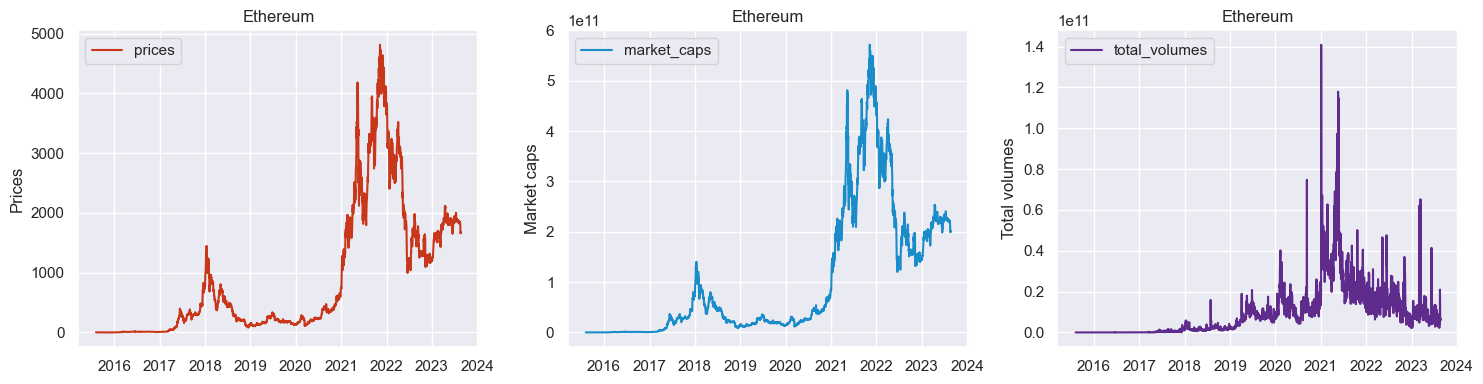

Impresión del DataFrame de Cardano:
            date   prices       market_caps    total_volumes       id
0     2017-10-18 0.026845  696021404.307960   2351678.122306  cardano
1     2017-10-19 0.026830  695622018.255994   2815155.969600  cardano
2     2017-10-20 0.030300  785580027.642410   8883473.082063  cardano
3     2017-10-21 0.028588  741202123.879770   5308856.917096  cardano
4     2017-10-22 0.027796  720669848.472413   2901876.122086  cardano
...          ...      ...               ...              ...      ...
2131  2023-08-19 0.263688 9235485828.738451 265109511.755594  cardano
2132  2023-08-20 0.268186 9404358467.172031 141040323.324678  cardano
2133  2023-08-21 0.270308 9483518128.253633 141547595.073556  cardano
2134  2023-08-22 0.262942 9220418595.578129 175576119.874940  cardano
2135  2023-08-22 0.261218 9164036040.410938 172600700.894847  cardano

[2136 rows x 5 columns]


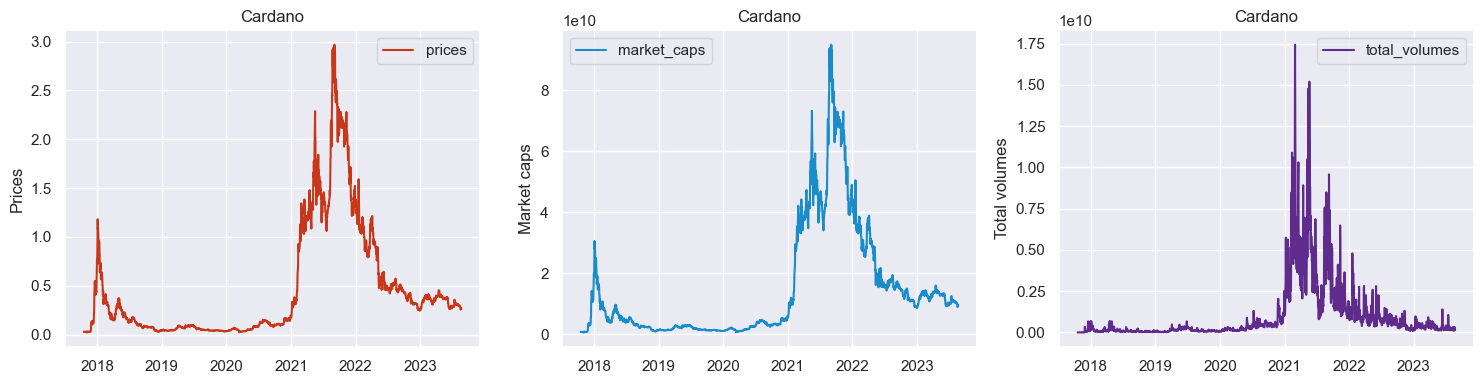

Impresión del DataFrame de Binancecoin:
            date     prices        market_caps    total_volumes           id
0     2017-09-16   0.107251    10725062.436515         1.051223  binancecoin
1     2017-09-17   0.154041    15404129.090981        14.678587  binancecoin
2     2017-09-18   0.173491    17349123.907272         6.001767  binancecoin
3     2017-09-19   0.168334    16833419.058268         3.878927  binancecoin
4     2017-09-20   0.166628    16662792.485644        40.687619  binancecoin
...          ...        ...                ...              ...          ...
2161  2023-08-19 215.972916 33229783482.267448 614638062.666760  binancecoin
2162  2023-08-20 217.075522 33409550693.504330 385398201.658992  binancecoin
2163  2023-08-21 216.240448 33283451361.901291 282623964.985347  binancecoin
2164  2023-08-22 210.588285 32430114844.885391 678066769.939408  binancecoin
2165  2023-08-22 210.095277 32311389454.570923 682714995.655860  binancecoin

[2166 rows x 5 columns]


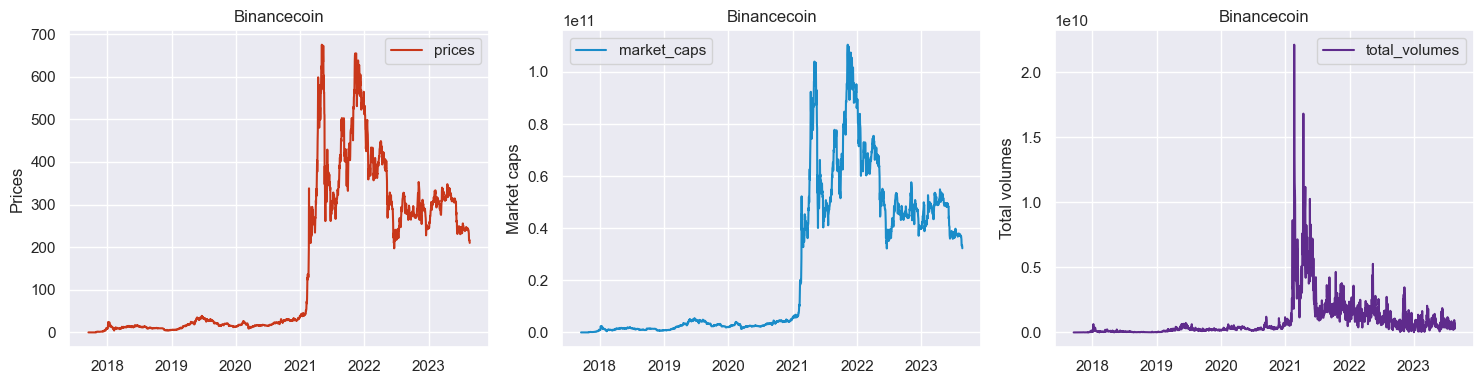

Impresión del DataFrame de Solana:
            date    prices       market_caps    total_volumes      id
0     2020-04-11  0.957606    7827651.892659  92672667.434470  solana
1     2020-04-12  0.784711    6173607.678345  49458692.875224  solana
2     2020-04-13  0.875994    7269680.447445  37821009.955602  solana
3     2020-04-14  0.786712    6302364.150585  19579214.892932  solana
4     2020-04-15  0.666673    5306221.065759  17523533.049867  solana
...          ...       ...               ...              ...     ...
1225  2023-08-19 21.330196 8681695608.575741 412220153.690789  solana
1226  2023-08-20 21.878330 8915137095.359207 254181454.346255  solana
1227  2023-08-21 21.747537 8865949897.077328 199999876.152217  solana
1228  2023-08-22 21.202109 8654520275.407608 350405754.293505  solana
1229  2023-08-22 21.072398 8585746411.236126 326500417.137850  solana

[1230 rows x 5 columns]


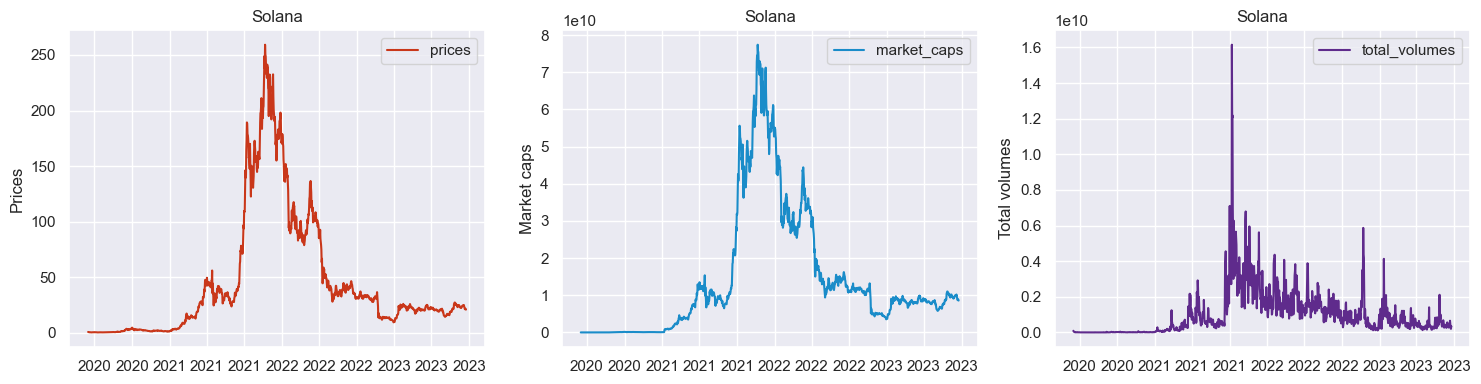

Impresión del DataFrame de Tron:
            date   prices       market_caps    total_volumes    id
0     2017-11-09 0.002387  156404161.617691   1224287.170176  tron
1     2017-11-10 0.002044  133968506.249282    990422.819500  tron
2     2017-11-11 0.001915  125470649.384029    707642.964341  tron
3     2017-11-12 0.001804  118235245.903263    814789.232403  tron
4     2017-11-13 0.002018  132386427.484935    894985.567811  tron
...          ...      ...               ...              ...   ...
2109  2023-08-19 0.072995 6529508622.265480 225980979.485800  tron
2110  2023-08-20 0.074094 6627051839.339880 151149396.499771  tron
2111  2023-08-21 0.075802 6774218508.004264 181964240.913839  tron
2112  2023-08-22 0.075175 6720213274.113491 206547445.052056  tron
2113  2023-08-22 0.074738 6687110377.476181 208813541.506788  tron

[2114 rows x 5 columns]


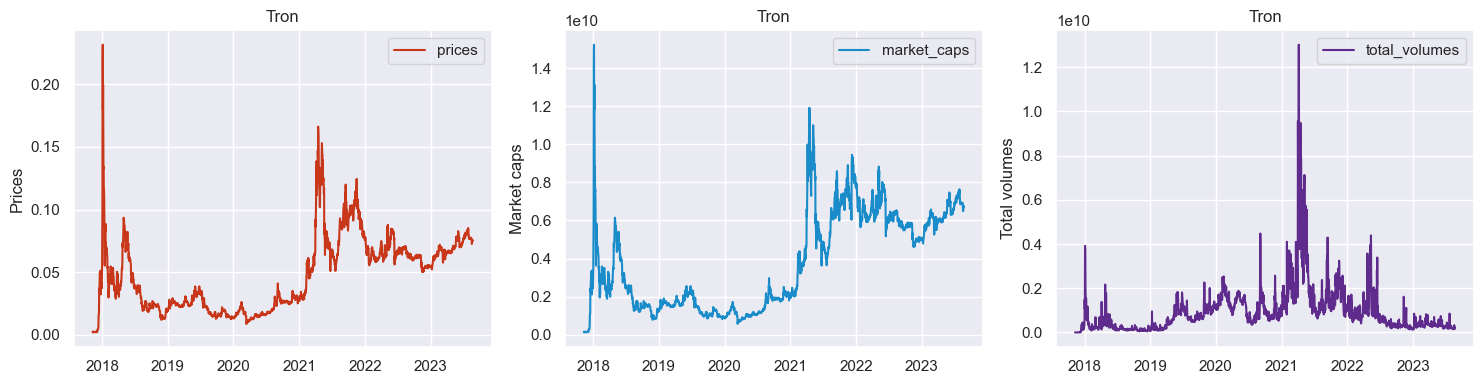

Impresión del DataFrame de Tether:
            date   prices        market_caps      total_volumes      id
0     2015-02-25 1.210160      304476.000000           5.000000  tether
1     2015-03-02 0.572521      144046.000000           2.000000  tether
2     2015-03-06 1.000000      251600.000000          50.000000  tether
3     2015-03-07 1.000000      251600.000000       58196.000000  tether
4     2015-03-08 1.000000      251600.000000          31.000000  tether
...          ...      ...                ...                ...     ...
3074  2023-08-19 0.999381 82846348503.310532 28473299901.716236  tether
3075  2023-08-20 1.000243 82827386555.773651  9788598090.786137  tether
3076  2023-08-21 0.999208 82764346526.226028 12729509298.406403  tether
3077  2023-08-22 0.999832 82809847575.736542 19777521452.342297  tether
3078  2023-08-22 0.999488 82826778182.997192 18359461039.250572  tether

[3079 rows x 5 columns]


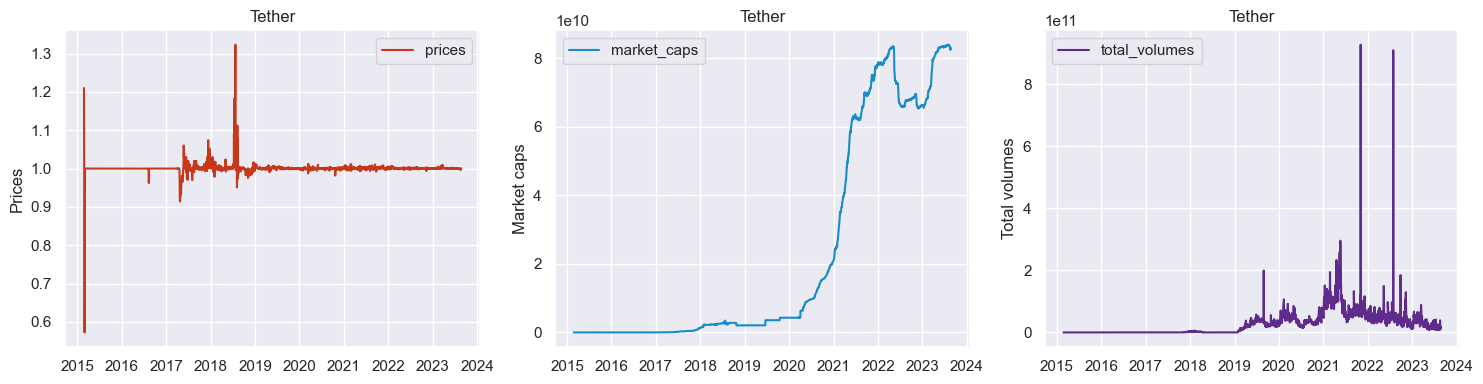

Impresión del DataFrame de Usd-coin:
            date   prices        market_caps     total_volumes        id
0     2018-10-05 1.006242           0.000000      31264.420430  usd-coin
1     2018-10-06 1.001530           0.000000      20254.712255  usd-coin
2     2018-10-07 1.001177           0.000000      49324.690669  usd-coin
3     2018-10-08 1.001906           0.000000      47076.728142  usd-coin
4     2018-10-09 1.001983           0.000000      55542.215509  usd-coin
...          ...      ...                ...               ...       ...
1779  2023-08-19 0.999658 25990994493.248333 4443167383.300334  usd-coin
1780  2023-08-20 1.000504 25986054890.886066 1939243150.522984  usd-coin
1781  2023-08-21 0.999293 25989247153.045475 2958012652.606243  usd-coin
1782  2023-08-22 0.999317 25976853369.848312 3778254223.054719  usd-coin
1783  2023-08-22 1.000061 25966876731.297318 4153649015.886347  usd-coin

[1784 rows x 5 columns]


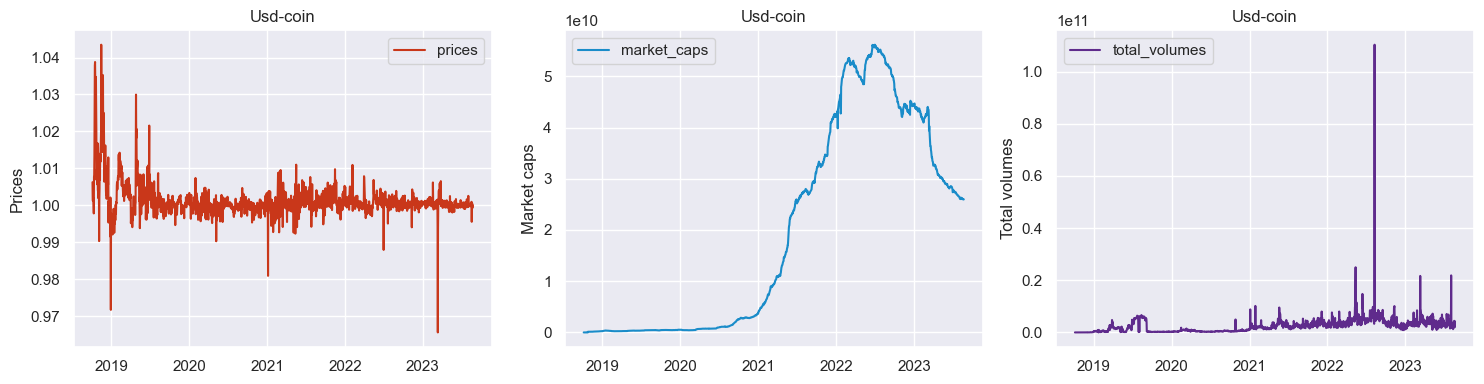

Impresión del DataFrame de Dai:
            date   prices       market_caps    total_volumes   id
0     2019-11-19 1.000651    1437645.883635    872764.202140  dai
1     2019-11-20 0.995411    6945898.406514   4841468.549063  dai
2     2019-11-21 0.991591    8989928.013739   1007819.527859  dai
3     2019-11-22 0.991102   12494872.076605   3679539.548076  dai
4     2019-11-23 0.992850   14391748.486609   7201905.087479  dai
...          ...      ...               ...              ...  ...
1369  2023-08-19 0.999997 3932615005.722220 157153816.683048  dai
1370  2023-08-20 1.000121 3927679363.009054  59930376.319865  dai
1371  2023-08-21 0.999753 3965357951.421936  55785499.552466  dai
1372  2023-08-22 0.999806 3960362087.203270  93052467.874652  dai
1373  2023-08-22 0.999646 3955444787.266256 102628351.835635  dai

[1374 rows x 5 columns]


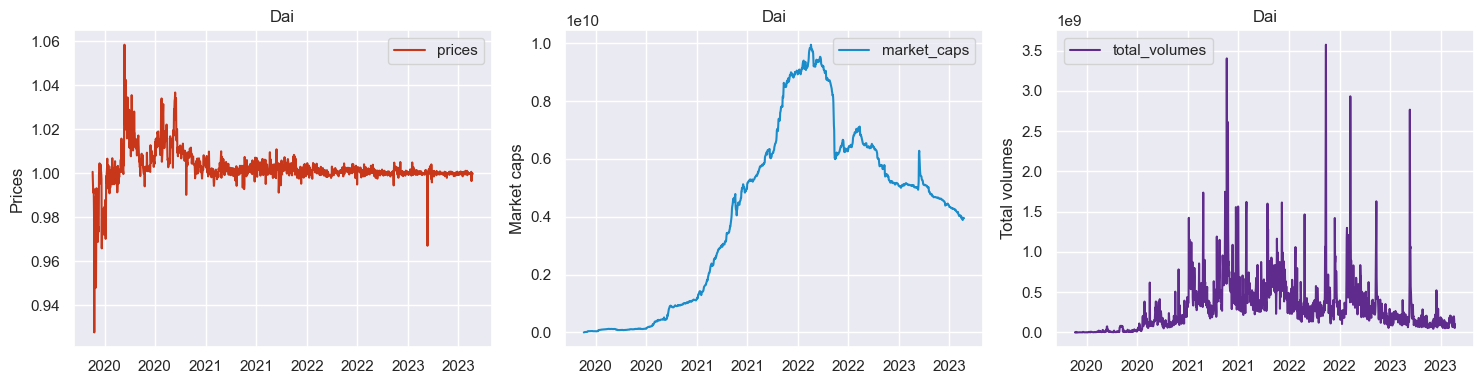

Impresión del DataFrame de Binance-usd:
            date   prices       market_caps     total_volumes           id
0     2019-09-21 1.000332          0.000000     255769.444784  binance-usd
1     2019-09-22 1.000671          0.000000     182705.826735  binance-usd
2     2019-09-23 0.999807          0.000000     150076.502061  binance-usd
3     2019-09-24 0.999933          0.000000    1528187.940941  binance-usd
4     2019-09-25 1.002317          0.000000    4093715.375718  binance-usd
...          ...      ...               ...               ...          ...
1428  2023-08-19 1.001223 3245755750.014512 3469145256.519783  binance-usd
1429  2023-08-20 0.999860 3242243424.874421 2602243618.772201  binance-usd
1430  2023-08-21 0.999270 3240040424.781133  963587502.686131  binance-usd
1431  2023-08-22 0.999902 3213384371.187875 1535393640.167140  binance-usd
1432  2023-08-22 0.999992 3215283787.943163  540554394.575396  binance-usd

[1433 rows x 5 columns]


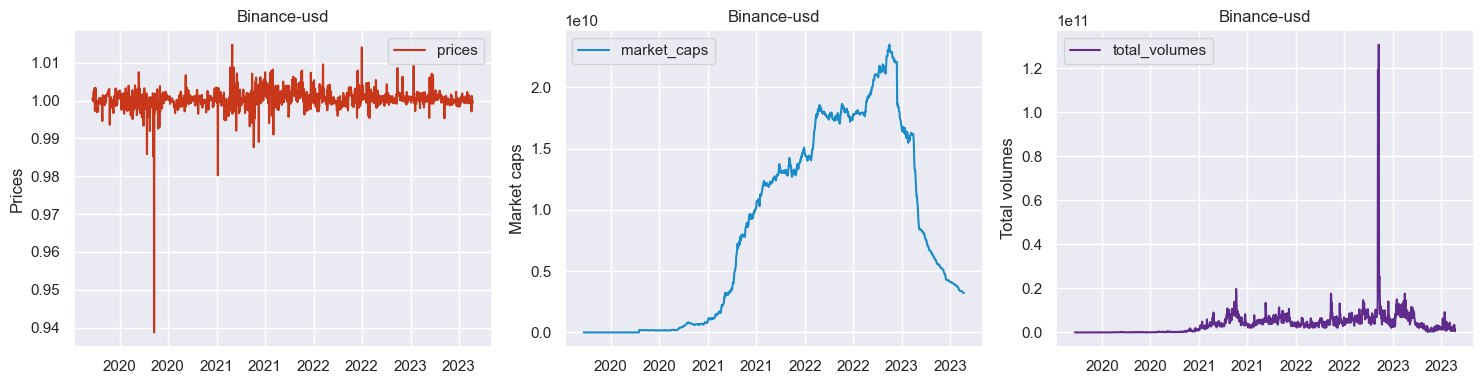

Impresión del DataFrame de True-usd:
            date   prices       market_caps     total_volumes        id
0     2018-03-23 1.005918    6618487.544399    4879159.895938  true-usd
1     2018-03-24 0.998446    6569325.710396    3141895.271719  true-usd
2     2018-03-25 0.989117    7837876.293890    1447413.695221  true-usd
3     2018-03-26 0.996653    7897589.369341    1413981.651350  true-usd
4     2018-03-27 0.999969    7923872.658186    3379900.945773  true-usd
...          ...      ...               ...               ...       ...
1975  2023-08-19 0.999702 2762881560.873710 3332793695.081952  true-usd
1976  2023-08-20 0.999877 2762151134.638918  234668012.168936  true-usd
1977  2023-08-21 0.999001 2760693890.511237 1090422299.926217  true-usd
1978  2023-08-22 0.999265 2752938039.003853 2191430133.846170  true-usd
1979  2023-08-22 0.999615 2753327547.137126 2181673273.240877  true-usd

[1980 rows x 5 columns]


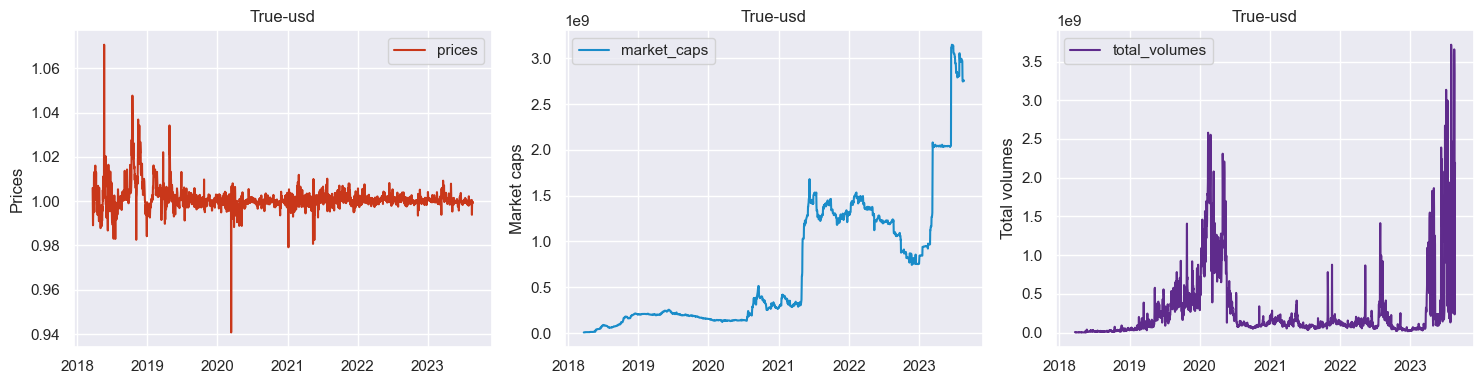

Impresión del DataFrame de Staked-ether:
           date      prices        market_caps   total_volumes            id
0    2020-12-22  617.164997           0.000000   137563.026557  staked-ether
1    2020-12-23  617.164997           0.000000   137563.026557  staked-ether
2    2020-12-24  596.767711     4424223.373088    67102.259216  staked-ether
3    2020-12-25  611.504712     5651612.707359    54336.794215  staked-ether
4    2020-12-26  624.800420     7284743.945719    45933.064541  staked-ether
..          ...         ...                ...             ...           ...
970  2023-08-19 1659.990165 13560560825.126221 25265068.441063  staked-ether
971  2023-08-20 1668.863869 13683448649.885233 24361720.306218  staked-ether
972  2023-08-21 1683.121243 13812247718.837658  5056610.743987  staked-ether
973  2023-08-22 1667.354058 13775162028.358068  9289767.275610  staked-ether
974  2023-08-22 1662.944596 13785200480.073929  9627315.551248  staked-ether

[975 rows x 5 columns]


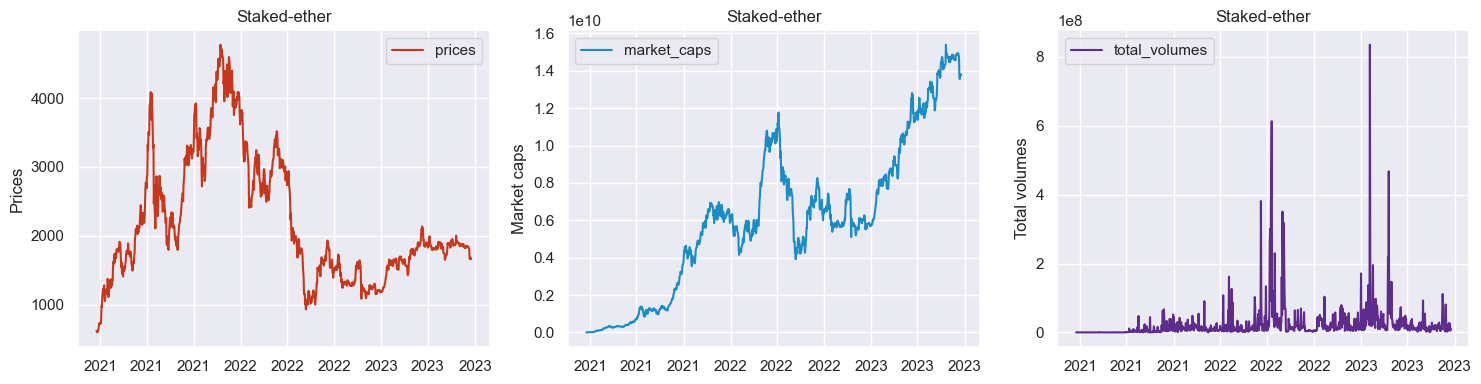

Impresión del DataFrame de Uniswap:
            date   prices       market_caps     total_volumes       id
0     2020-09-17 3.443832  219913212.478698 1802085330.293668  uniswap
1     2020-09-18 3.443832  219913212.478698 1802085330.293668  uniswap
2     2020-09-19 7.097694  732822061.033078 5688408416.882498  uniswap
3     2020-09-20 5.702061  647208421.070714 2050756493.492213  uniswap
4     2020-09-21 5.256579  632421347.516945 1316669226.584856  uniswap
...          ...      ...               ...               ...      ...
1066  2023-08-19 4.907400 3698749910.770939  125610744.775007  uniswap
1067  2023-08-20 4.905424 3697122480.014646   82017462.773516  uniswap
1068  2023-08-21 4.898566 3692837419.679048   76845226.740964  uniswap
1069  2023-08-22 4.768798 3597190952.954893   86075630.307863  uniswap
1070  2023-08-22 4.728281 3563576865.909283   93301172.375192  uniswap

[1071 rows x 5 columns]


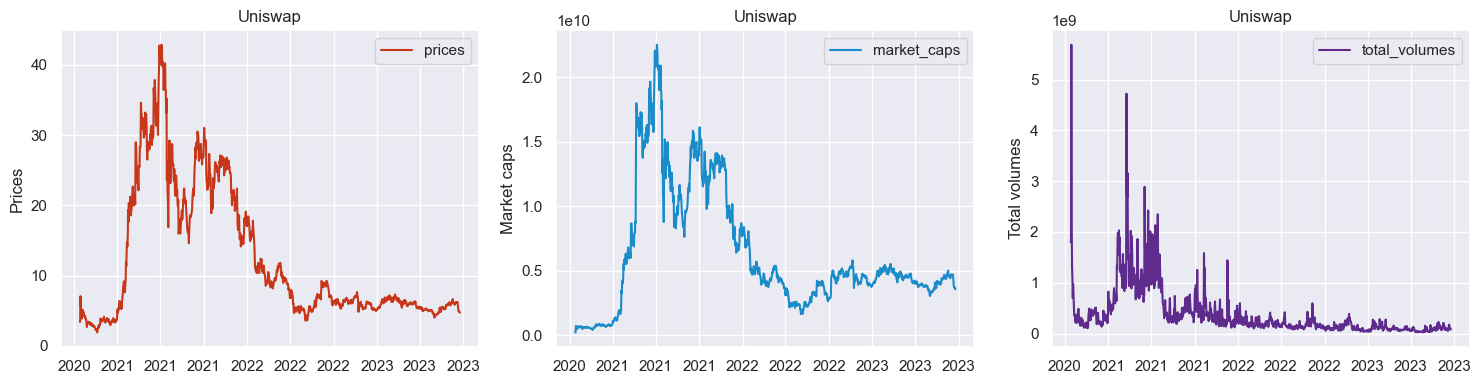

Impresión del DataFrame de Chainlink:
            date   prices       market_caps    total_volumes         id
0     2017-11-09 0.225377   78881828.348247   3190025.855166  chainlink
1     2017-11-10 0.189036   66162748.000257   2121175.273130  chainlink
2     2017-11-11 0.181223   63427934.797573   2229297.696601  chainlink
3     2017-11-12 0.170013   59504620.609935   5361145.800395  chainlink
4     2017-11-13 0.180691   63241859.461104   2942234.064639  chainlink
...          ...      ...               ...              ...        ...
2109  2023-08-19 6.169827 3314622806.894173 268760408.230564  chainlink
2110  2023-08-20 6.175369 3322534658.385207 148183631.701073  chainlink
2111  2023-08-21 6.206875 3339962103.083129 117283917.516310  chainlink
2112  2023-08-22 6.175230 3323632893.063544 195175297.187150  chainlink
2113  2023-08-22 6.166499 3317163692.837610 188684201.937972  chainlink

[2114 rows x 5 columns]


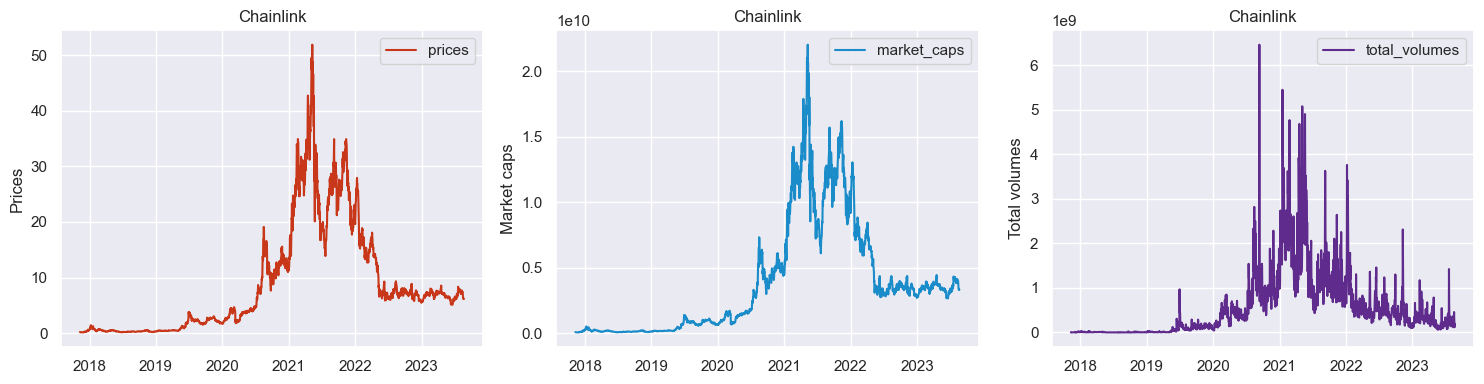

Impresión del DataFrame de Lido-dao:
           date   prices       market_caps   total_volumes        id
0    2021-01-05 1.750891    5193325.774885 12582828.723461  lido-dao
1    2021-01-06 1.750891    5193325.774885 12582828.723461  lido-dao
2    2021-01-07 1.760411    5667691.609361  6423586.093913  lido-dao
3    2021-01-08 1.426809    4586996.157828  2079384.121385  lido-dao
4    2021-01-09 1.495403    4803312.257939  1086874.849088  lido-dao
..          ...      ...               ...             ...       ...
956  2023-08-19 1.634169 1434727686.608397 76262632.419043  lido-dao
957  2023-08-20 1.650597 1450986053.443390 55693515.719237  lido-dao
958  2023-08-21 1.670352 1467601796.199281 29075482.628241  lido-dao
959  2023-08-22 1.622158 1428100718.092094 41298123.667817  lido-dao
960  2023-08-22 1.643048 1447156516.762203 42892481.527880  lido-dao

[961 rows x 5 columns]


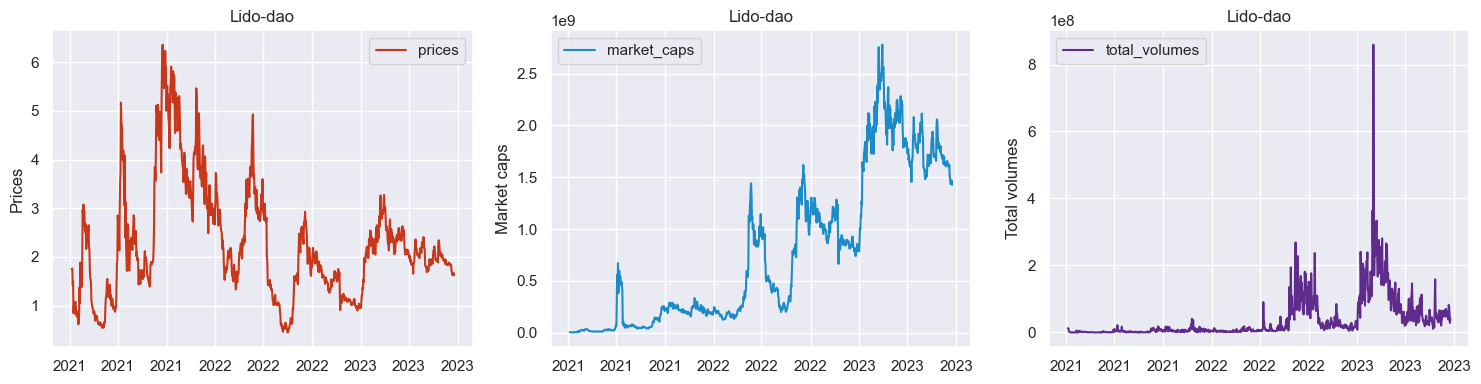

Impresión del DataFrame de Maker:
            date      prices      market_caps   total_volumes     id
0     2017-12-20 1089.367108         0.000000   549285.040796  maker
1     2017-12-21 1514.260031         0.000000     1620.258233  maker
2     2017-12-22  873.829216         0.000000    34285.563105  maker
3     2017-12-23 1042.820865         0.000000   199742.109292  maker
4     2017-12-24 1240.926279         0.000000    71416.798687  maker
...          ...         ...              ...             ...    ...
2068  2023-08-19 1070.910501 965350724.597017 86676243.200898  maker
2069  2023-08-20 1101.681386 991800130.295028 44133981.703428  maker
2070  2023-08-21 1108.910719 998924490.081499 45893852.573818  maker
2071  2023-08-22 1093.922676 986899175.942949 69505105.869993  maker
2072  2023-08-22 1102.172853 993400458.383293 71782227.381153  maker

[2073 rows x 5 columns]


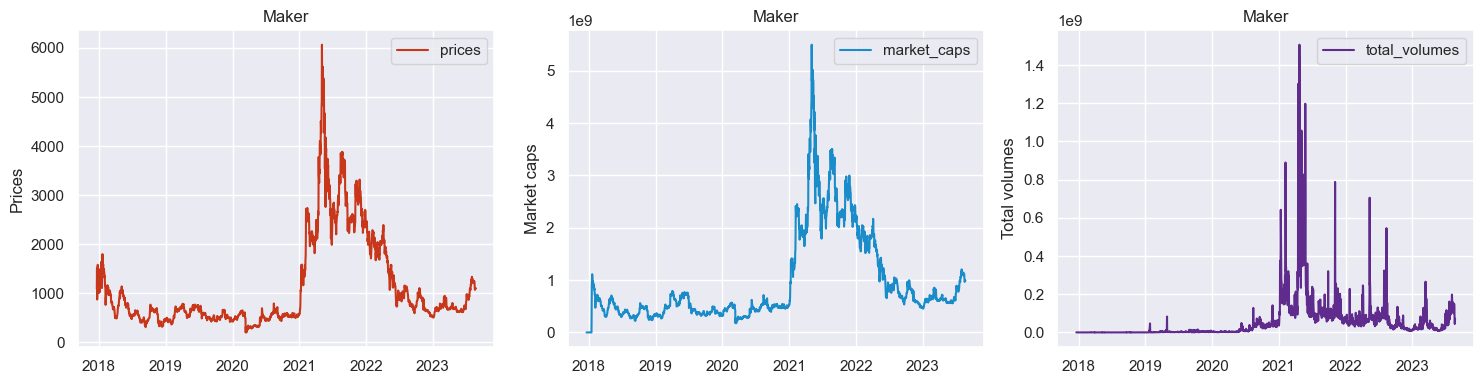

In [296]:
coins_id = [
    'ethereum', 'cardano', 'binancecoin', 'solana', 'tron',
    'tether', 'usd-coin', 'dai', 'binance-usd', 'true-usd', 
    'staked-ether', 'uniswap', 'chainlink', 'lido-dao', 'maker'
]

nrow = 1
ncol = 3
colors = ['#c9371a', '#1a8cc9', '#5f2b8c']
columns_to_plot = ['prices', 'market_caps', 'total_volumes']

coin_dataframes = {}  # Creamos un diccionario para almacenar los DataFrames

for coin in coins_id:
    df_coin = cg.get_coin_market_chart_by_id(id=coin, vs_currency='usd', days='max')
    df_coin['prices'] = cambiar_fecha(df_coin['prices'])
    df_coin['market_caps'] = cambiar_fecha(df_coin['market_caps'])
    df_coin['total_volumes'] = cambiar_fecha(df_coin['total_volumes'])
    dates = [item[0] for item in df_coin['prices']]
    prices = [item[1] for item in df_coin['prices']]
    market_caps = [item[1] for item in df_coin['market_caps']]
    total_volumes = [item[1] for item in df_coin['total_volumes']]
    df_coin = pd.DataFrame({'date': dates, 'prices': prices, 'market_caps': market_caps, 'total_volumes': total_volumes})
    df_coin['date'] = pd.to_datetime(df_coin['date'])
    df_coin['date'] = df_coin['date'].dt.date
    df_coin['id'] = coin

    coin_dataframes[coin] = df_coin  # Agregamos el DataFrame al diccionario
    
    print(f"Impresión del DataFrame de {coin.capitalize()}:")
    print(df_coin)

    
    # Generamos el gráfico de las columnas 'prices', 'market_caps', 'total_volumes' de cada Dataframe
    fig, axes = plt.subplots(nrow, ncol, figsize=(15, 4), squeeze=False)
    count = 0
    for r in range(nrow):
        for c in range(ncol):
            if count < len(columns_to_plot):
                column_name = columns_to_plot[count]
                ax = df_coin.plot(x='date', y=column_name, ax=axes[r, c], color=colors[count])
                ax.set_title(coin.capitalize())
                locator = AutoDateLocator()
                ax.xaxis.set_major_locator(locator)
                formatter = DateFormatter('%Y')
                ax.xaxis.set_major_formatter(formatter)
                ax.set_xlabel(None)
                ax.set_ylabel(column_name.replace('_', ' ').capitalize())
                count += 1
            else:
                axes[r, c].axis('off')
    plt.tight_layout()
    plt.show()


Después de observar los gráficos de Precios, Capitalización de Mercado y Volumen Total se concluye que en no realizar extracción de Outliers teniendo en cuenta que estamos observando valores que están sujetos a una continua volatilidad elevada. Por lo cual podríamos afectar a los valores reales

<h2>Nulos y Duplicados</h2>
Examinamos las columnas de los Dataframes creados para detectar valores nulos y duplicados

In [297]:
for coin in coins_id:
    coin_df = coin_dataframes[coin]
    print(f"Cantidad de valores nulos en {coin.capitalize()}:")
    print(coin_df.isnull().sum())
    print(f"Cantidad de valores duplicados en {coin.capitalize()}:")
    print(coin_df.duplicated().sum())


Controlamos si existen valores nulos en Ethereum:
date             0
prices           0
market_caps      1
total_volumes    0
id               0
dtype: int64
Cantidad de valores duplicados en Ethereum:
0
Controlamos si existen valores nulos en Cardano:
date             0
prices           0
market_caps      0
total_volumes    0
id               0
dtype: int64
Cantidad de valores duplicados en Cardano:
0
Controlamos si existen valores nulos en Binancecoin:
date             0
prices           0
market_caps      0
total_volumes    0
id               0
dtype: int64
Cantidad de valores duplicados en Binancecoin:
0
Controlamos si existen valores nulos en Solana:
date             0
prices           0
market_caps      0
total_volumes    0
id               0
dtype: int64
Cantidad de valores duplicados en Solana:
0
Controlamos si existen valores nulos en Tron:
date             0
prices           0
market_caps      0
total_volumes    0
id               0
dtype: int64
Cantidad de valores duplicados

Nombramos los distintos Dataframes que se obtuvieron de la función

In [298]:
ethereum_df = coin_dataframes['ethereum']
cardano_df = coin_dataframes['cardano']
binancecoin_df = coin_dataframes['binancecoin']
solana_df = coin_dataframes['solana']
tron_df = coin_dataframes['tron']
tether_df = coin_dataframes['tether']
usd_coin_df = coin_dataframes['usd-coin']
dai_df = coin_dataframes['dai']
binance_usd_df = coin_dataframes['binance-usd']
true_usd_df = coin_dataframes['true-usd']
staked_ether_df = coin_dataframes['staked-ether']
uniswap_df = coin_dataframes['uniswap']
chainlink_df = coin_dataframes['chainlink']
lido_dao_df = coin_dataframes['lido-dao']
maker_df = coin_dataframes['maker']

Realizamos una interpolación en el valor nulo que posee la columna 'market_caps' del Dataframe 'Ethereum'

In [299]:
filas_sin_nulos = ethereum_df[ethereum_df.isnull().any(axis=1)]
filas_sin_nulos

,date,prices,market_caps,total_volumes,id
603,2017-04-02,48.378467,NaN,86493796.356034,ethereum


In [300]:
ethereum_df['market_caps'].interpolate(method='index', inplace=True)

In [301]:
filas = ethereum_df.iloc[602:605]
filas

,date,prices,market_caps,total_volumes,id
602,2017-04-01,50.425788,4554446900.250353,57319943.037191,ethereum
603,2017-04-02,48.378467,4246591529.290529,86493796.356034,ethereum
604,2017-04-03,43.579240,3938736158.330706,107658222.897448,ethereum


Graficámos todos los DataFrames a través de la columna 'market-caps' para identificar su movimiento en el tiempo

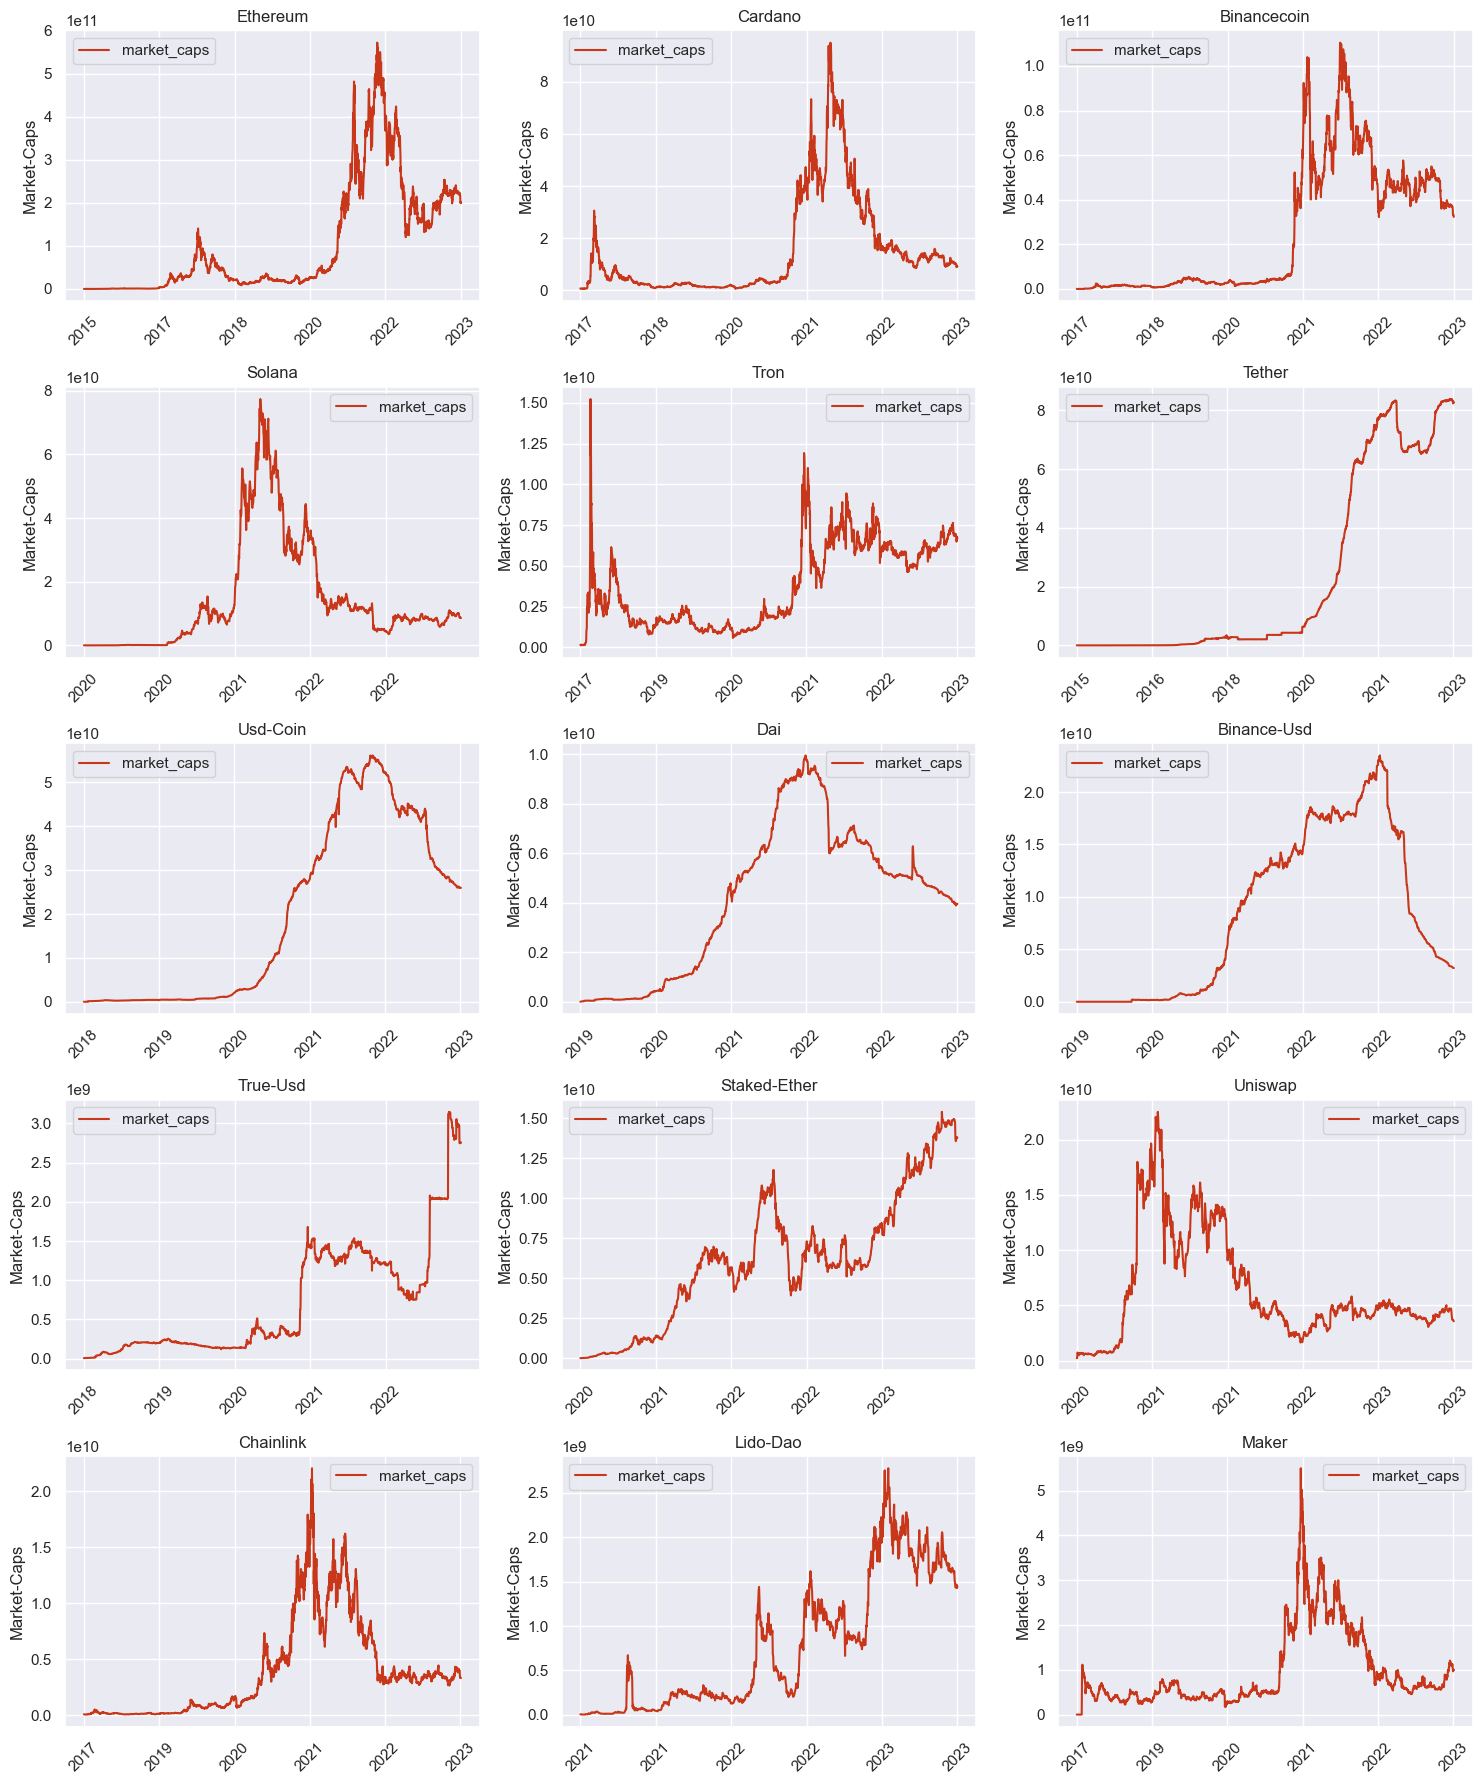

In [302]:
# Definimos un diccionario de los DataFrames que serán graficados
df_dict = {
    'Ethereum': ethereum_df,
    'Cardano': cardano_df,
    'Binancecoin': binancecoin_df,
    'Solana': solana_df,
    'Tron': tron_df,
    'Tether': tether_df,
    'Usd-Coin': usd_coin_df,
    'Dai': dai_df,
    'Binance-Usd': binance_usd_df,
    'True-Usd': true_usd_df,
    'Staked-Ether': staked_ether_df,
    'Uniswap': uniswap_df,
    'Chainlink': chainlink_df,
    'Lido-Dao': lido_dao_df,
    'Maker': maker_df
}

# Cambiamos el tipo de las columnas 'date'
for df_name, df in df_dict.items():
    df['date'] = pd.to_datetime(df['date'])

# Generamos el gráfico de la columna 'close' de cada Dataframe
nrow = 5
ncol = 3

color = ['#c9371a']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 18))
count = 0

for r in range(nrow):
    for c in range(ncol):
        if count < len(df_dict):
            df_name = list(df_dict.keys())[count]
            df = df_dict[df_name]
            ax = df['market_caps'].plot(ax=axes[r, c], color=color)
            axes[r, c].set_title(f'{df_name}')
            axes[r, c].set_xticks(range(0, len(df), len(df)//5))
            axes[r, c].set_xticklabels(df['date'][::len(df)//5].dt.year, rotation=45)
            axes[r, c].set_ylabel('Market-Caps')
            ax.legend()
            count += 1
        else:
            axes[r, c].axis('off')

plt.tight_layout()
plt.show()

Únimos los DataFrames en horizontal para poder generar la Matriz de Correlación

In [326]:
# Creamos una copia de los DataFrames antes de renombrar las columnas para evitar que afecten el entorno global
copied_dataframes = {coin: df.copy() for coin, df in coin_dataframes.items()}

# Renombramo las columnas de cada DataFrame en la copia
for coin, df in copied_dataframes.items():
    rename_columns(df, f'_{coin}')
# Combinamos los DataFrames usando el método reduce
merged_df = reduce(lambda left, right: pd.merge(left, right, on='date', how='outer'), copied_dataframes.values())
merged_df.drop_duplicates(subset='date', inplace=True)
merged_df = merged_df.sort_values(by='date')
merged_df.reset_index(drop=True, inplace=True)

merged_df = merge_and_clean_dataframes(coin_dataframes)
merged_df.tail(5)

,date,prices_ethereum,market_caps_ethereum,total_volumes_ethereum,id_ethereum,prices_cardano,market_caps_cardano,total_volumes_cardano,id_cardano,prices_binancecoin,...,total_volumes_chainlink,id_chainlink,prices_lido-dao,market_caps_lido-dao,total_volumes_lido-dao,id_lido-dao,prices_maker,market_caps_maker,total_volumes_maker,id_maker
3088,2023-08-18,1675.862171,201482976932.077728,20962774898.104233,ethereum,0.254361,8918502746.085836,340643581.743293,cardano,217.795538,...,457285098.408579,chainlink,1.626860,1435660154.853227,82191172.854361,lido-dao,1079.973853,975116317.989281,131812837.585847,maker
3089,2023-08-19,1660.679110,199322878932.424866,11856910739.734947,ethereum,0.263688,9235485828.738451,265109511.755594,cardano,215.972916,...,268760408.230564,chainlink,1.634169,1434727686.608397,76262632.419043,lido-dao,1070.910501,965350724.597017,86676243.200898,maker
3090,2023-08-20,1669.233455,200676423059.470795,8226872103.119698,ethereum,0.268186,9404358467.172031,141040323.324678,cardano,217.075522,...,148183631.701073,chainlink,1.650597,1450986053.443390,55693515.719237,lido-dao,1101.681386,991800130.295028,44133981.703428,maker
3091,2023-08-21,1682.461825,202267391138.312469,6156816706.795544,ethereum,0.270308,9483518128.253633,141547595.073556,cardano,216.240448,...,117283917.516310,chainlink,1.670352,1467601796.199281,29075482.628241,lido-dao,1108.910719,998924490.081499,45893852.573818,maker
3092,2023-08-22,1666.840465,200439393151.863922,6712093708.842867,ethereum,0.262942,9220418595.578129,175576119.874940,cardano,210.588285,...,195175297.187150,chainlink,1.622158,1428100718.092094,41298123.667817,lido-dao,1093.922676,986899175.942949,69505105.869993,maker


Creamos una Matriz de Correlación para los distintos valores extraidos de los Dataframes anteriores

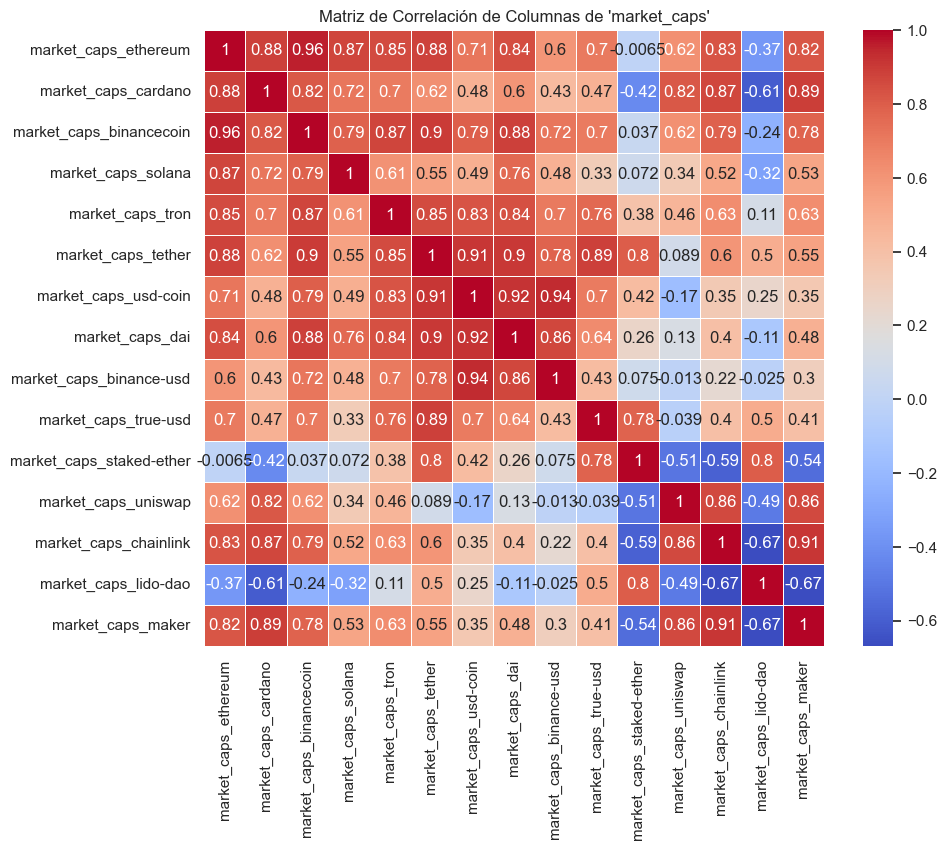

In [304]:
# Matriz de Correlación de las columnas 'market_caps'
correlation_market_caps = merged_df.filter(like='market_caps').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_market_caps, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación de Columnas de 'market_caps'")
plt.show()

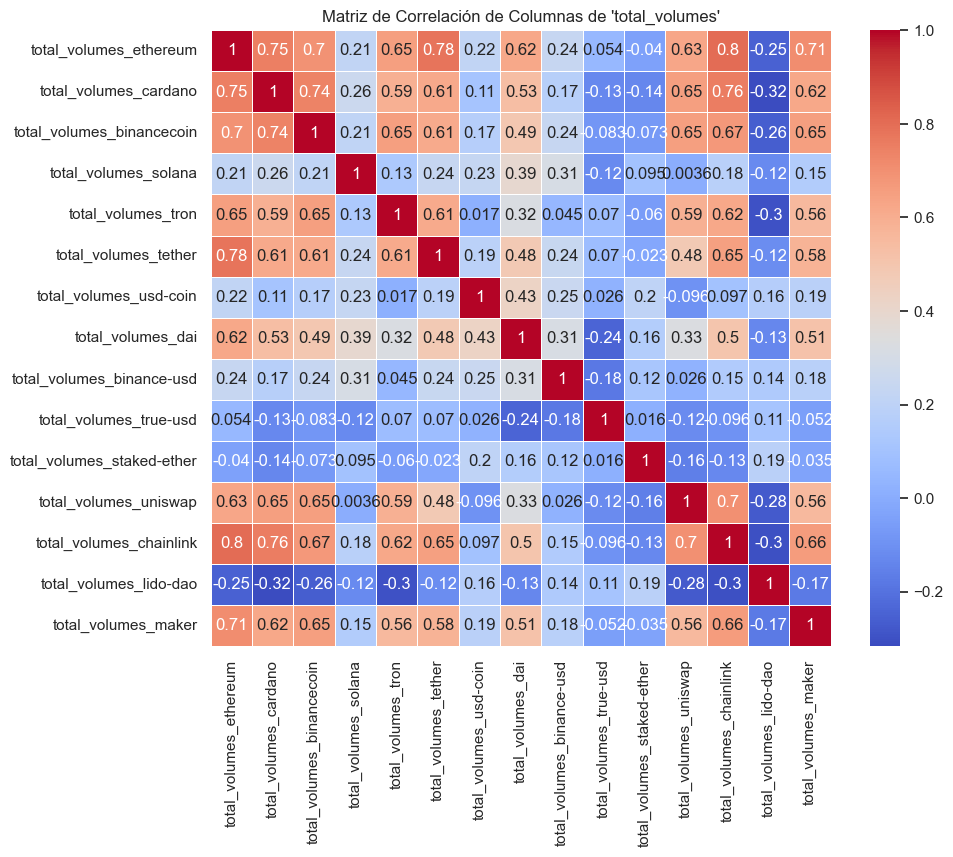

In [305]:
# Matriz de Correlación de las columnas 'total_volumes'
correlation_volumes = merged_df.filter(like='total_volumes').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_volumes, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación de Columnas de 'total_volumes'")
plt.show()

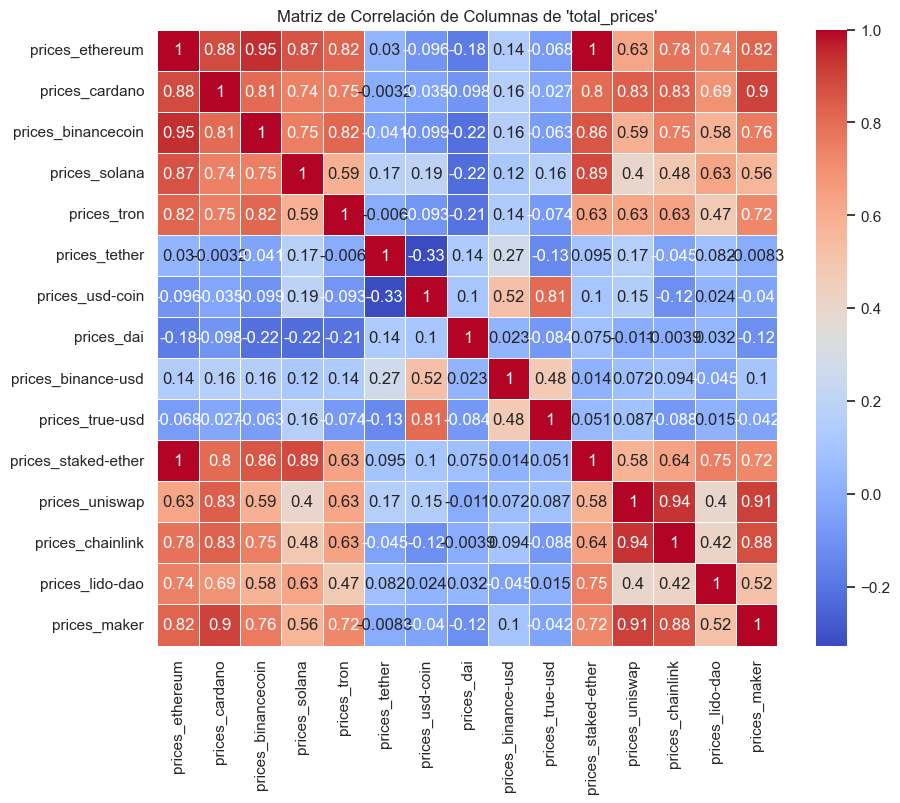

In [306]:
#Matriz de Correlación de las columnas 'total_prices'
correlation_prices = merged_df.filter(like='prices').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_prices, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación de Columnas de 'total_prices'")
plt.show()

<h2>Extracción de Criptomonedas (Parte 2)</h2>
Creamos nuevamente una función para cambiar las fechas de los siguientes Dataframes que serán extraídos

In [307]:
def cambiar_fechas(unix_timestamp):
    formatted_date = datetime.fromtimestamp(unix_timestamp / 1000).strftime('%Y-%m-%d %H:%M')
    return formatted_date

Extraemos las criptomonedas por categorías con datos de 'open', 'high', 'low' y 'close'

In [308]:
coins_ids = [
    'ethereum', 'cardano', 'binancecoin', 'solana', 'tron',
    'tether', 'usd-coin', 'dai', 'binance-usd', 'true-usd', 
    'staked-ether', 'uniswap', 'chainlink', 'lido-dao', 'maker'
]

ohlcv_dataframes = {}  # Diccionario para almacenar los DataFrames

for coin_id in coins_ids:
    df_ohlcv = cg.get_coin_ohlc_by_id(id=coin_id, vs_currency='usd', days='max')
    columns = ['date', 'open', 'high', 'low', 'close']
    df_ohlcv = pd.DataFrame(df_ohlcv, columns=columns)
    df_ohlcv['date'] = df_ohlcv['date'].apply(cambiar_fechas)
    df_ohlcv['id'] = coin_id
    
    ohlcv_dataframes[coin_id] = df_ohlcv  # Almacena el DataFrame en el diccionario

# Imprime los DataFrames resultantes
for coin_id, df_ohlcv in ohlcv_dataframes.items():
    print(f'{coin_id.capitalize()} Prices:\n{df_ohlcv}\n')


Ethereum Prices:
                 date        open        high         low       close  \
0    2015-08-07 02:00    2.830000    2.830000    2.830000    2.830000   
1    2015-08-11 02:00    1.330000    1.330000    0.687586    1.067000   
2    2015-08-15 02:00    1.260000    1.830000    1.260000    1.670000   
3    2015-08-19 02:00    1.480000    1.480000    1.200000    1.250000   
4    2015-08-23 02:00    1.480000    1.480000    1.360000    1.360000   
..                ...         ...         ...         ...         ...   
762  2023-08-07 02:00 1835.700000 1835.700000 1826.710000 1826.710000   
763  2023-08-11 02:00 1826.930000 1856.840000 1826.930000 1850.880000   
764  2023-08-15 02:00 1847.540000 1848.510000 1839.510000 1843.510000   
765  2023-08-19 02:00 1826.910000 1826.910000 1660.680000 1660.680000   
766  2023-08-23 02:00 1669.230000 1682.460000 1666.840000 1666.840000   

           id  
0    ethereum  
1    ethereum  
2    ethereum  
3    ethereum  
4    ethereum  
..        

<h2>Nulos y Duplicados</h2>
Examinamos las columnas de los Dataframes creados para detectar valores nulos y duplicados

In [309]:
for coin_id, df_ohlcv in ohlcv_dataframes.items():
    print(f'Cantidad de valores nulos en {coin_id.capitalize()}:')
    print(df_ohlcv.isnull().sum())
    print(f'Cantidad de valores duplicados en {coin_id.capitalize()}:')
    print(df_ohlcv.duplicated().sum())
    print()

Controlamos si existen valores nulos en Ethereum:
date     0
open     0
high     0
low      0
close    0
id       0
dtype: int64
Cantidad de valores duplicados en Ethereum:
0

Controlamos si existen valores nulos en Cardano:
date     0
open     0
high     0
low      0
close    0
id       0
dtype: int64
Cantidad de valores duplicados en Cardano:
0

Controlamos si existen valores nulos en Binancecoin:
date     0
open     0
high     0
low      0
close    0
id       0
dtype: int64
Cantidad de valores duplicados en Binancecoin:
0

Controlamos si existen valores nulos en Solana:
date     0
open     0
high     0
low      0
close    0
id       0
dtype: int64
Cantidad de valores duplicados en Solana:
0

Controlamos si existen valores nulos en Tron:
date     0
open     0
high     0
low      0
close    0
id       0
dtype: int64
Cantidad de valores duplicados en Tron:
0

Controlamos si existen valores nulos en Tether:
date     0
open     0
high     0
low      0
close    0
id       0
dtype: int64
C

In [310]:
# Definimos los DataFrames
ethereum_df_prices = ohlcv_dataframes['ethereum']
cardano_df_prices = ohlcv_dataframes['cardano']
binancecoin_df_prices = ohlcv_dataframes['binancecoin']
solana_df_prices = ohlcv_dataframes['solana']
tron_df_prices = ohlcv_dataframes['tron']
tether_df_prices = ohlcv_dataframes['tether']
usd_coin_df_prices = ohlcv_dataframes['usd-coin']
dai_df_prices = ohlcv_dataframes['dai']
binance_usd_df_prices = ohlcv_dataframes['binance-usd']
true_usd_df_prices = ohlcv_dataframes['true-usd']
staked_ether_df_prices = ohlcv_dataframes['staked-ether']
uniswap_df_prices = ohlcv_dataframes['uniswap']
chainlink_df_prices = ohlcv_dataframes['chainlink']
lido_dao_df_prices = ohlcv_dataframes['lido-dao']
maker_df_prices = ohlcv_dataframes['maker']

<h2>Visualización de Precios</h2>
Graficámos todos los DataFrames a través de la columna 'close' para identificar su movimiento en el tiempo

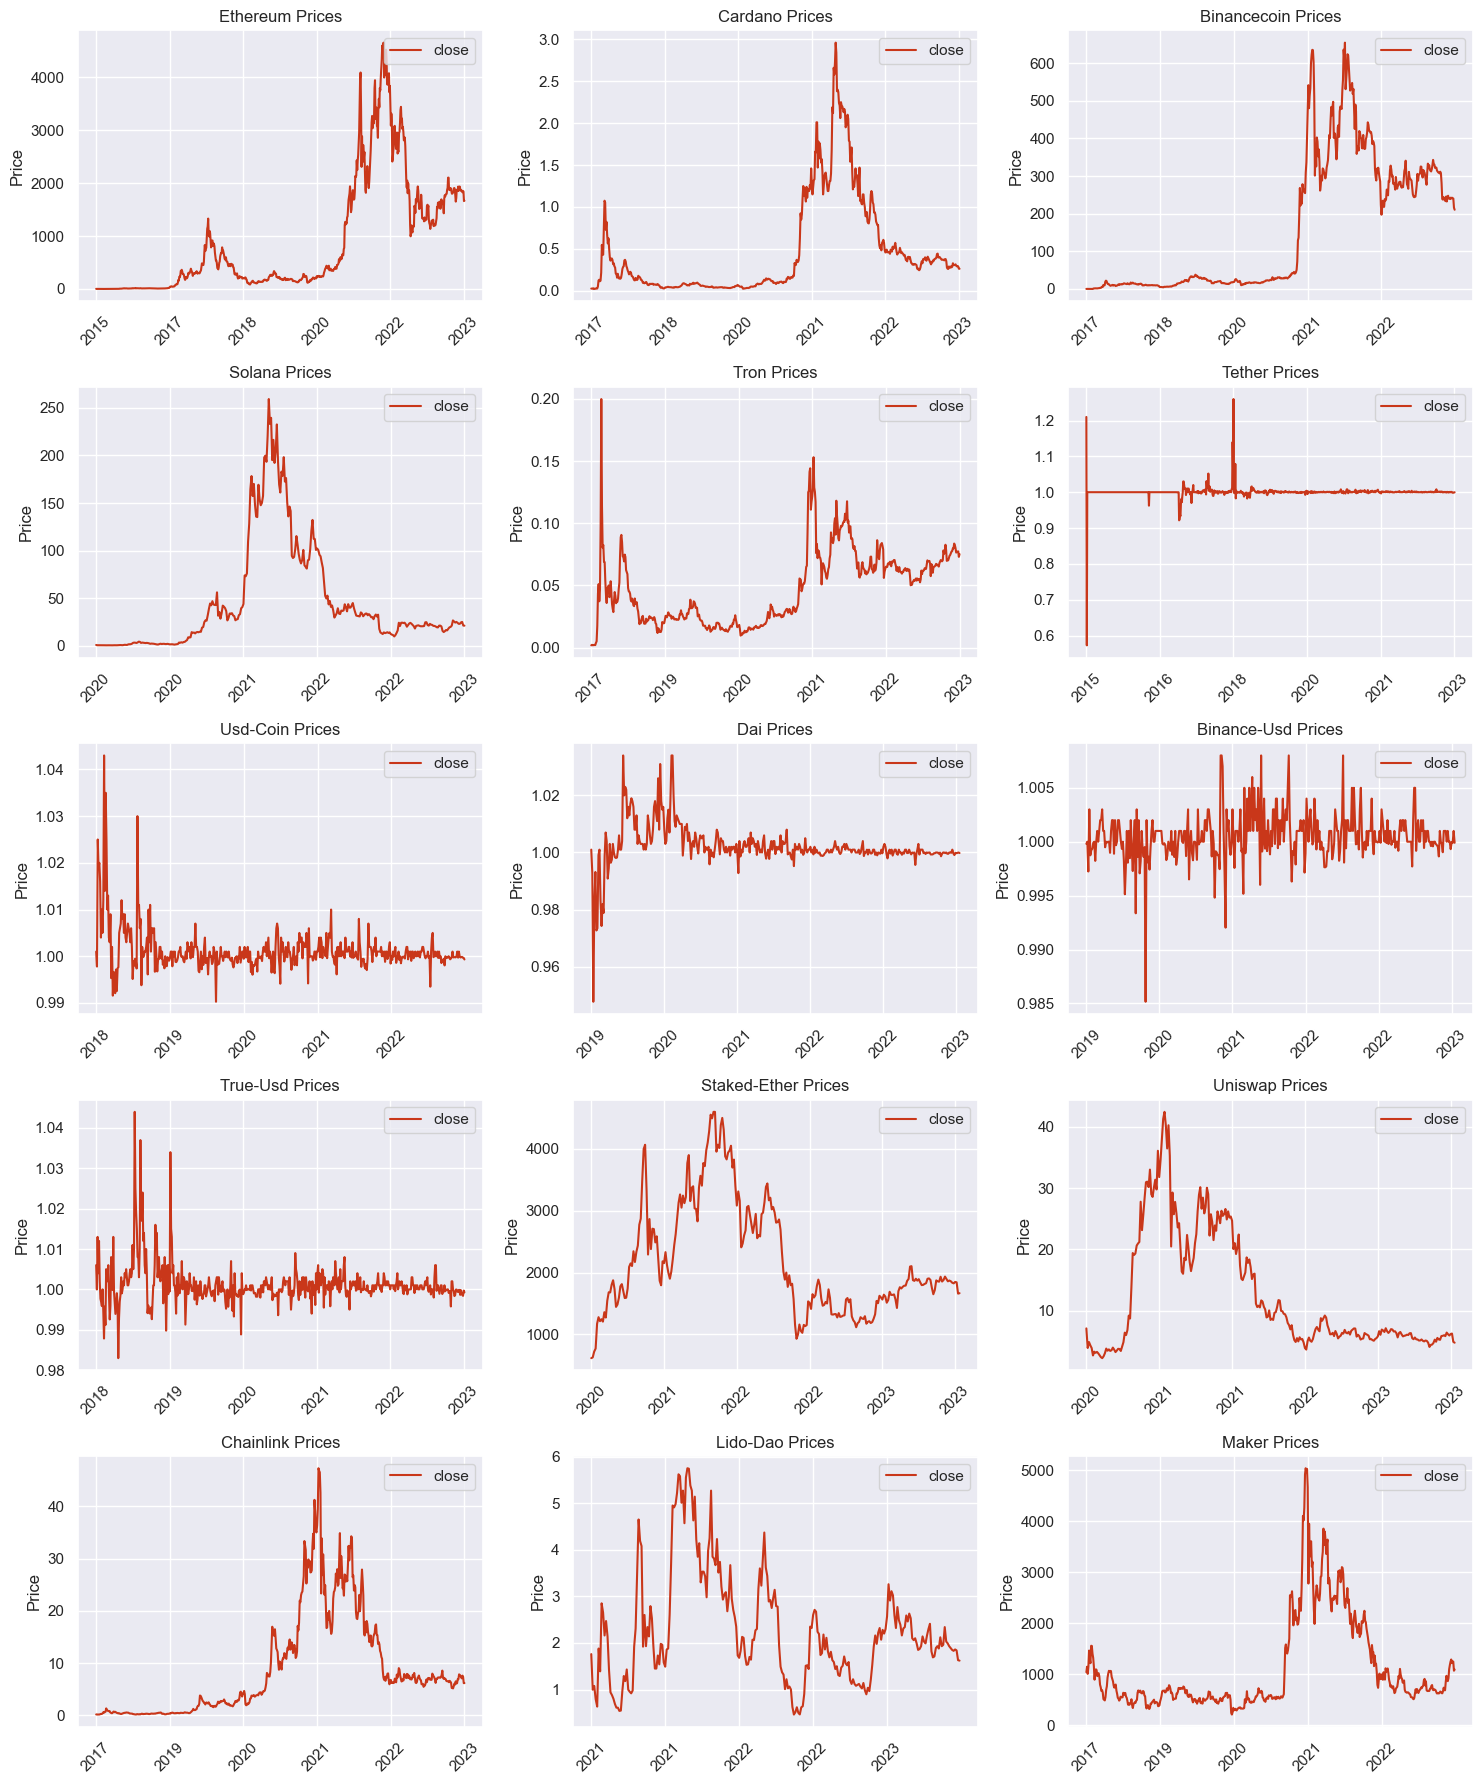

In [325]:
# Definimos un diccionario de los DataFrames que serán graficados
df_dict = {
    'Ethereum Prices': ethereum_df_prices,
    'Cardano Prices': cardano_df_prices,
    'Binancecoin Prices': binancecoin_df_prices,
    'Solana Prices': solana_df_prices,
    'Tron Prices': tron_df_prices,
    'Tether Prices': tether_df_prices,
    'Usd-Coin Prices': usd_coin_df_prices,
    'Dai Prices': dai_df_prices,
    'Binance-Usd Prices': binance_usd_df_prices,
    'True-Usd Prices': true_usd_df_prices,
    'Staked-Ether Prices': staked_ether_df_prices,
    'Uniswap Prices': uniswap_df_prices,
    'Chainlink Prices': chainlink_df_prices,
    'Lido-Dao Prices': lido_dao_df_prices,
    'Maker Prices': maker_df_prices
}

# Cambiamos el tipo de las columnas 'date'
for df_name, df in df_dict.items():
    df['date'] = pd.to_datetime(df['date'])

# Generamos el gráfico de la columna 'close' de cada Dataframe
nrow = 5
ncol = 3

color = ['#c9371a']
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 18))
count = 0

for r in range(nrow):
    for c in range(ncol):
        if count < len(df_dict):
            df_name = list(df_dict.keys())[count]
            df = df_dict[df_name]
            ax = df['close'].plot(ax=axes[r, c], color=color)
            axes[r, c].set_title(f'{df_name}')
            axes[r, c].set_xticks(range(0, len(df), len(df)//5))
            axes[r, c].set_xticklabels(df['date'][::len(df)//5].dt.year, rotation=45)
            axes[r, c].set_ylabel('Price')
            ax.legend(loc='upper right')
            count += 1
        else:
            axes[r, c].axis('off')

plt.tight_layout()
plt.show()

<h2>Concatenación de DataFrames</h2>
Únimos cada par de DataFrames entre sí para poder concatenarlos y facilitar la lectura de los mismos en Power BI. Además eliminamos de la columna 'date' la hora, los minutos y los segundos, que no aportan valor para el tipo de análisis que se realizará

In [315]:
def merge_and_process_dataframes(df, df_prices):
    df['date'] = df['date'].dt.date
    df_prices['date'] = df_prices['date'].dt.date
    
    df_combined = pd.merge(df, df_prices, on='date', how='outer')
    df_combined = df_combined.rename(columns={'id_x': 'id'})
    columns_to_drop = ['id_y']
    df_combined = df_combined.drop(columns=columns_to_drop)
    
    return df_combined

In [316]:
# Lista de pares de DataFrames a combinar
dataframe_pairs = [
    (ethereum_df, ethereum_df_prices),
    (cardano_df, cardano_df_prices),
    (binancecoin_df, binancecoin_df_prices),
    (solana_df, solana_df_prices),
    (tron_df, tron_df_prices),
    (tether_df, tether_df_prices),
    (usd_coin_df, usd_coin_df_prices),
    (dai_df, dai_df_prices),
    (binance_usd_df, binance_usd_df_prices),
    (true_usd_df, true_usd_df_prices),
    (staked_ether_df, staked_ether_df_prices),
    (uniswap_df, uniswap_df_prices),
    (chainlink_df, chainlink_df_prices),
    (lido_dao_df, lido_dao_df_prices),
    (maker_df, maker_df_prices),
]

In [317]:
# Procesamos y combinamos los DataFrames
combined_dataframes = {}
for df, df_prices in dataframe_pairs:
    coin_name = df['id'].iloc[0]
    combined_df = merge_and_process_dataframes(df, df_prices)
    combined_dataframes[coin_name] = combined_df
combined_dataframes

In [319]:
# Concatenamos los DataFrames del diccionario
final_combined_df = pd.concat(combined_dataframes.values(), ignore_index=True)
final_combined_df

             date      prices      market_caps   total_volumes        id  \
0      2015-08-07    2.831620         0.000000    90622.000000  ethereum   
1      2015-08-08    1.330750  80339475.000000   368070.000000  ethereum   
2      2015-08-10    0.687586  41556309.211122   400464.074544  ethereum   
3      2015-08-11    1.067379  64539006.306272  1518998.205337  ethereum   
4      2015-08-12    1.256613  76013261.054154  2073893.345031  ethereum   
...           ...         ...              ...             ...       ...   
27441  2023-08-20 1101.681386 991800130.295028 44133981.703428     maker   
27442  2023-08-21 1108.910719 998924490.081499 45893852.573818     maker   
27443  2023-08-22 1093.922676 986899175.942949 69505105.869993     maker   
27444  2023-08-22 1102.172853 993400458.383293 71782227.381153     maker   
27445  2023-08-23         NaN              NaN             NaN       NaN   

             open        high         low       close  
0        2.830000    2.830000  

In [321]:
# Eliminamos los valores nulos de la columna 'id' que no nos brindan información
final_combined_df = final_combined_df.dropna(subset=['id'])
final_combined_df

In [323]:
# Guardamos el DataFrame final listo para importar a Power Bi
final_combined_df.to_csv('final_combined_df.csv')